In [1]:
# 📦 Imports
import numpy as np
import pandas as pd
from google.colab import files

# 🎲 1. Generate Dummy Data
np.random.seed(42)

# Class 0
mean0 = [2, 2]
cov0 = [[1, 0.5], [0.5, 1]]
data0 = np.random.multivariate_normal(mean0, cov0, 100)
labels0 = np.zeros(100)

# Class 1
mean1 = [5, 5]
cov1 = [[1, -0.3], [-0.3, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)
labels1 = np.ones(100)

# 🔀 2. Combine into a DataFrame
X = np.vstack((data0, data1))
y = np.hstack((labels0, labels1))

df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y.astype(int)

# 🧾 3. Save to CSV
filename = "bayesian_dummy_dataset.csv"
df.to_csv(filename, index=False)

# 📥 4. Download Link in Colab
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy on test set: 1.00


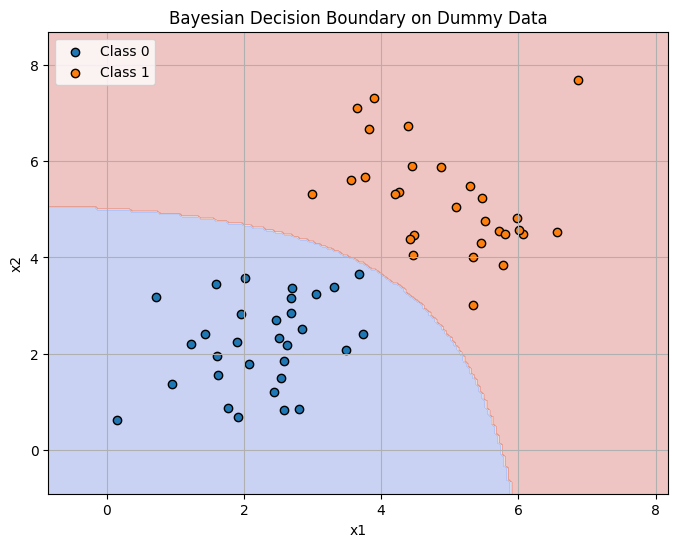

In [2]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 📥 1. Load the dataset
df = pd.read_csv("bayesian_dummy_dataset.csv")

# 🧹 2. Split features and labels
X = df[["x1", "x2"]].values
y = df["label"].values

# 🔀 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧠 4. Estimate parameters for each class (Gaussian)
def estimate_parameters(X_class):
    mean = np.mean(X_class, axis=0)
    cov = np.cov(X_class.T)
    return mean, cov

# Separate data by class
X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

mean0, cov0 = estimate_parameters(X0)
mean1, cov1 = estimate_parameters(X1)

# Priors
prior0 = len(X0) / len(X_train)
prior1 = len(X1) / len(X_train)

# Likelihoods
rv0 = multivariate_normal(mean=mean0, cov=cov0)
rv1 = multivariate_normal(mean=mean1, cov=cov1)

# 📈 5. Bayesian classifier
def bayesian_classifier(x):
    p0 = rv0.pdf(x) * prior0
    p1 = rv1.pdf(x) * prior1
    return 0 if p0 > p1 else 1

# 🔍 6. Predict on test data
y_pred = np.array([bayesian_classifier(x) for x in X_test])

# 🎯 7. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.2f}")

# 🖼️ 8. Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([bayesian_classifier(point) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label="Class 0", edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label="Class 1", edgecolor='k')
plt.title("Bayesian Decision Boundary on Dummy Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Show first 10 rows
df.head(10)
# Get basic info and summary
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   label   200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


,x1,x2,label
count,200.000000,200.000000,200.000000
mean,3.502700,3.623109,0.500000
std,1.724891,1.768708,0.501255
min,0.147275,0.084219,0.000000
25%,2.062882,2.193943,0.000000
50%,3.491646,3.474092,0.500000
75%,4.879279,5.185298,1.000000
max,7.182135,7.694551,1.000000


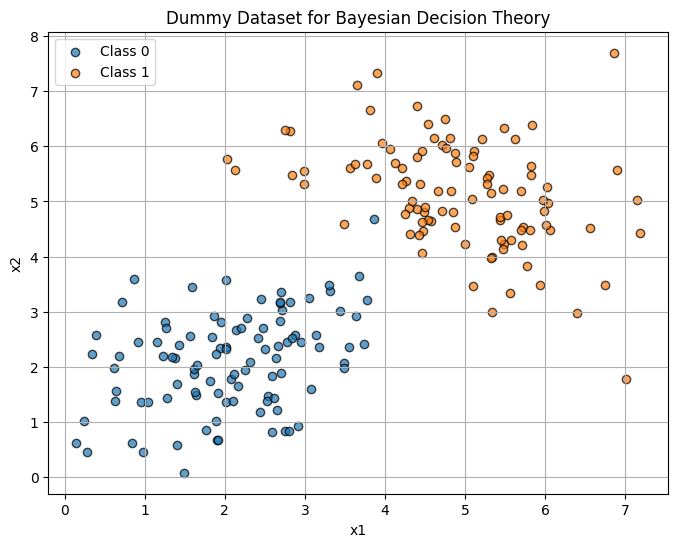

In [4]:
# Scatter plot of the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f"Class {label}", alpha=0.7, edgecolor='k')

plt.title("Dummy Dataset for Bayesian Decision Theory")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


Accuracy on Iris test set: 1.000


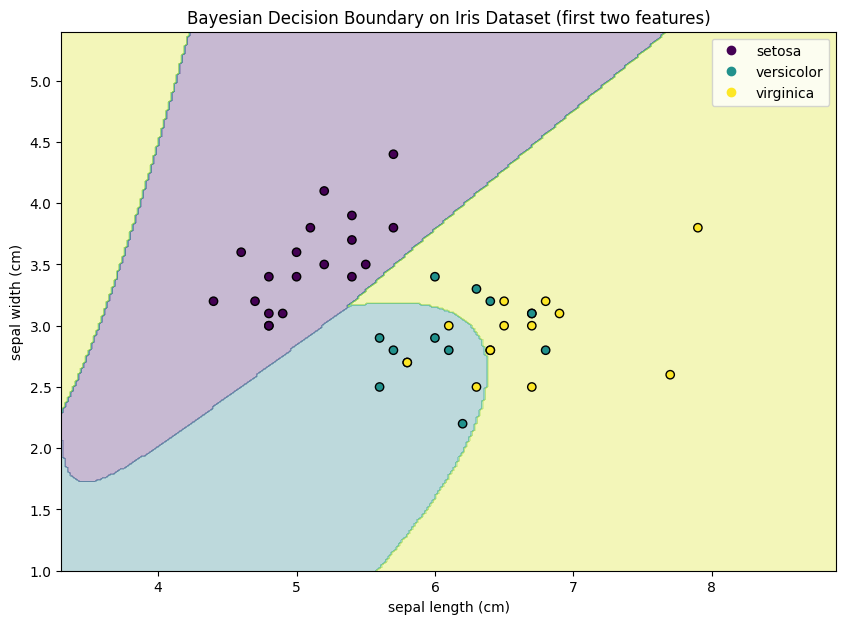

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Estimate parameters (mean, cov) and priors for each class
classes = np.unique(y_train)
params = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean = np.mean(X_c, axis=0)
    cov = np.cov(X_c.T)
    prior = len(X_c) / len(X_train)
    params[c] = {'mean': mean, 'cov': cov, 'prior': prior}

# 4. Bayesian classifier function
def bayes_classifier(x):
    posteriors = []
    for c in classes:
        mean = params[c]['mean']
        cov = params[c]['cov']
        prior = params[c]['prior']
        likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov)
        posterior = likelihood * prior
        posteriors.append(posterior)
    return np.argmax(posteriors)

# 5. Predict test set
y_pred = np.array([bayes_classifier(x) for x in X_test])

# 6. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Iris test set: {acc:.3f}")

# 7. Visualize decision boundary using only first two features
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Re-estimate parameters with only 2 features
params_2d = {}
for c in classes:
    X_c = X_train_2d[y_train == c]
    mean = np.mean(X_c, axis=0)
    cov = np.cov(X_c.T)
    prior = len(X_c) / len(X_train)
    params_2d[c] = {'mean': mean, 'cov': cov, 'prior': prior}

def bayes_classifier_2d(x):
    posteriors = []
    for c in classes:
        mean = params_2d[c]['mean']
        cov = params_2d[c]['cov']
        prior = params_2d[c]['prior']
        likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov)
        posterior = likelihood * prior
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([bayes_classifier_2d(point) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Bayesian Decision Boundary on Iris Dataset (first two features)")

# Legend fix: convert handles and labels to list to avoid ValueError
handles, _ = scatter.legend_elements()
plt.legend(handles=list(handles), labels=list(class_names))
plt.show()